# Ex06 - Primeiros passos para a Transformada de Fourier

### Parte 1 - Gerando ondas senoidas 1D e 2D

Melhore o notebook sobre ondas senoidais ([link](08 Ondas senoidais.ipynb)), gerando outras senoides 2D e tentando interpretar o significado dos períodos $T_r$, $T_c$ e $T$, bem como das ferquências normalizadas $u$ e $v$. Comece tentando gerar senoides 2D, onde $T_r$ ou $T_c$ é nulo. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft2
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

/home/furusato/tests/jupyter/jupyter/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/furusato/tests/jupyter/jupyter/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


""
""

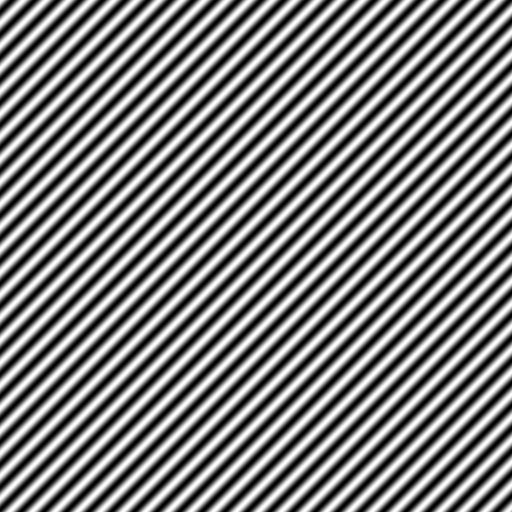

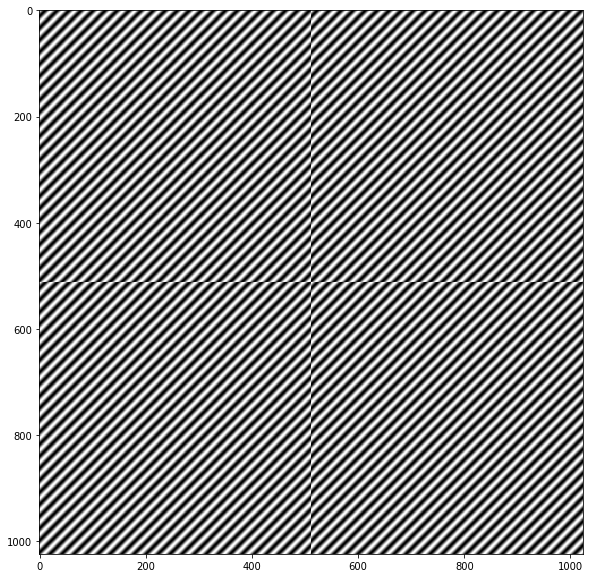

In [24]:
theta = 45 * np.pi/180

H = 512
W = 512
s = (H,W)
T = 16

# theta = (1*np.pi/2)
f = ia.cos(s, T, theta, 0)
# f = np.pad(f, 10, mode='constant', constant_values=f.max())

ia.adshow(ia.normalize(f, [0,255]))

from PIL import Image

# result = Image.fromarray(ia.normalize(f, [0, 255]))
# result.save('/home/furusato/cosine.tiff',compression="tiff_deflate", save_all=True)

f2 = np.hstack((f,f))
f3 = np.vstack( (f2,f2) )
fig = plt.figure(figsize=[10,10])
plt.imshow(f3, cmap='gray')
plt.show()

**OBS: estou usando a função adshow no lugar da implot pois percebi um efeito quadriculado na visualização (vejam abaixo).**

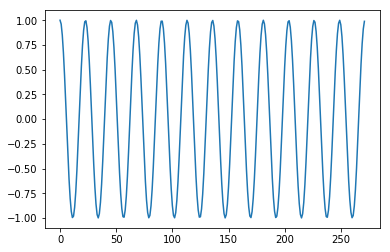

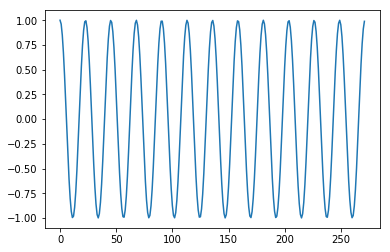

In [3]:
plt.plot(f[0])
plt.show()

plt.plot(f[:,0])
plt.show()

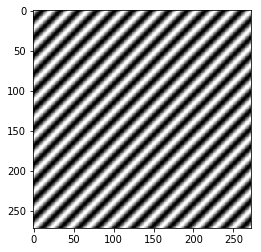

In [4]:
plt.imshow(f, cmap='gray')
plt.show()

### Parte 2 - Calculando a translação periódica

A próxima atividade consiste em entender as diferentes implementações da translação periódica. Procure comparar as 3 versões ([translação periódica](09 Translacao periodica.ipynb)). 

1. Primeiro, transforme a primeira implementação em uma função que recebe parâmetros para realizar a translação (rr, cc). 
2. Implemente a terceira forma indicada no link acima (usando slicing). 
3. Compare as 3 formas, em termos de resultado e de tempo. É provável que a última opção seja a mais eficiente de todas, pois somente utiliza fatiamento.

Um dos cuidados nas implementações é observar que os parâmetros da translação podem ser negativos ou ainda bem maiores que a largura ou altura da imagem.



### Parte 3 - Calculando a Transformada de Fourier de uma onda senoidal

Antes de continuar, leia sobre a Transformada Discreta de Fourier (DFT) e sobre a Transformada Rápida de Fourier (FFT). Além dos slides colocados no Google Calssroom, dê uma olhada em alguns links interessantes:

- [demo](http://bigwww.epfl.ch/demo/ip/demos/FFT/)
- [explicação intuitiva](https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/)

No exemplo abaixo, a partir da onda senoidal bidimensional gerada na parte 1, calculamos a Transformada de Fourier usando a função *fft2* do numpy. Para a visualização, é necessário fazer a translação periódica, para colocar a origem do espectro (0,0) no centro da imagem. Também é preciso usar o valor da magnitude do espectro resultante, já que o resultado da transformação é uma matriz complexa. E por fim, costumamos visualizar o log do resultado.

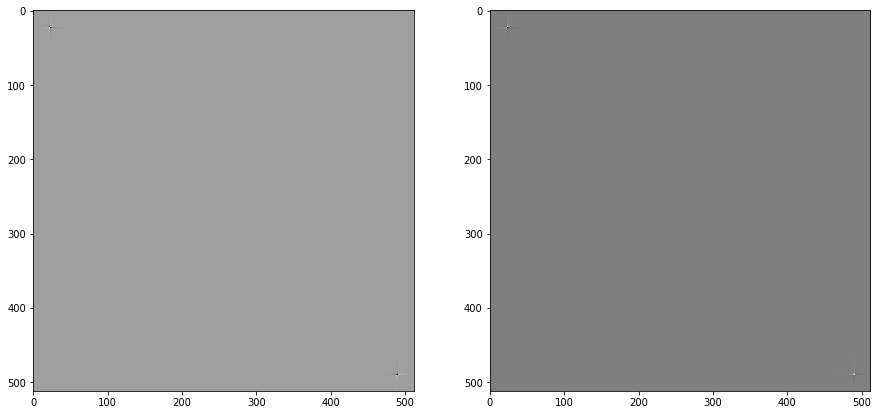

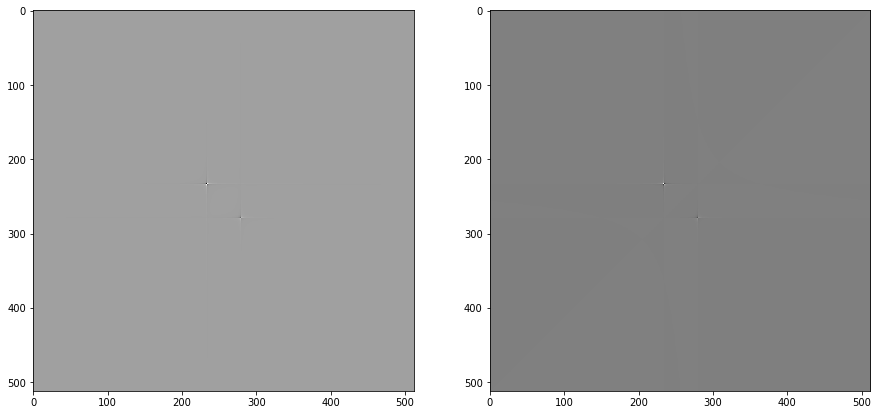

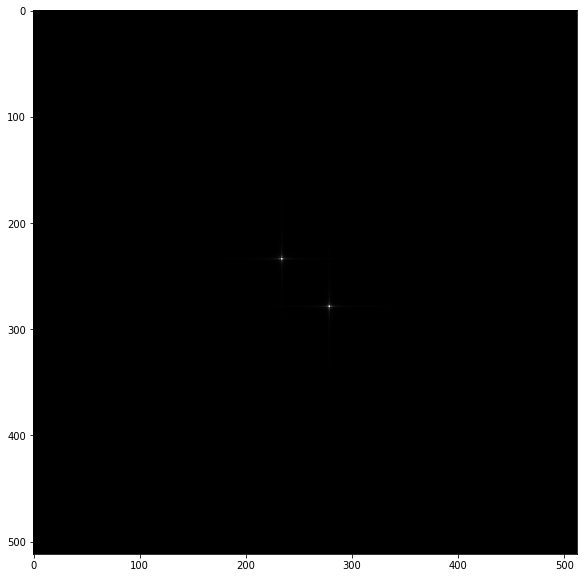

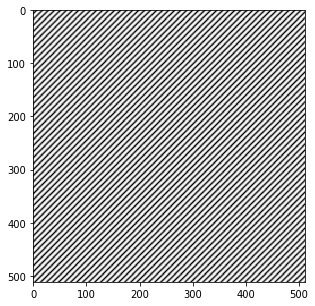

In [25]:
from numpy.fft import rfft2, fftshift
from numpy.fft import ifft2

faux = f.copy()
F = fft2(faux)
H,W = faux.shape

# sem log, sem transpose
fig = plt.figure(figsize=[15, 10])
fig.add_subplot(121)
plt.imshow(ia.normalize(F.real), cmap='gray')
fig.add_subplot(122)
plt.imshow(ia.normalize(F.imag), cmap='gray')
plt.show()

# sem log
fig = plt.figure(figsize=[15, 10])
fig.add_subplot(121)
plt.imshow((ia.ptrans(F,(H//2,W//2))+1).real, cmap='gray')
fig.add_subplot(122)
plt.imshow((ia.ptrans(F,(H//2,W//2))+1).imag, cmap='gray')
plt.show()

fig = plt.figure(figsize=[15, 10])
plt.imshow(ia.normalize( fftshift(np.abs(F)), [0,1] ), cmap='gray')
plt.show()

fig = plt.figure(figsize=[5, 5])
plt.imshow(ia.normalize((np.abs(ifft2(F)))), cmap='gray')
plt.show()

In [6]:
print(ia.normalize((np.abs(ifft2(F))))[120:150, 120:150].min())

8


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


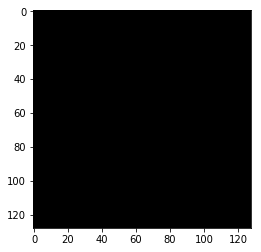

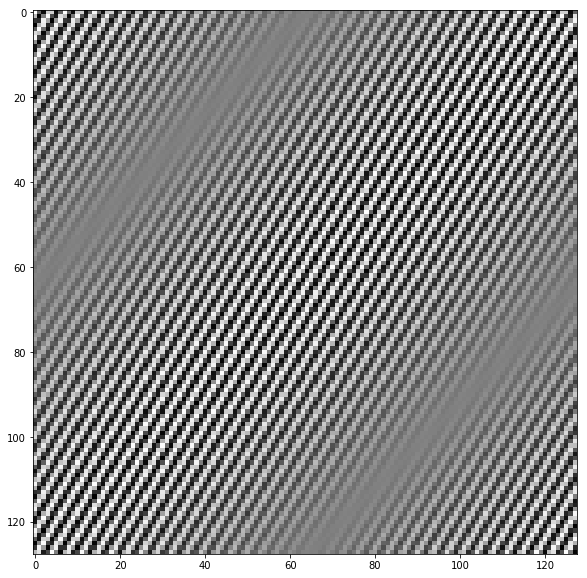

[[ 2.        +0.00000000e+00j -0.4380705 -1.07540272e-02j
  -1.8058008 -8.87133045e-02j ...  1.22712919-9.05184869e-02j
  -1.8058008 +8.87133045e-02j -0.4380705 +1.07540272e-02j]
 [ 0.89895183+2.20680288e-02j -1.93772562-9.51943552e-02j
  -0.04894947-3.61072953e-03j ... -0.85408017+4.19582682e-02j
  -1.57621798+3.86939797e-02j  1.54602091+0.00000000e+00j]
 [-1.18996352-5.84591589e-02j -1.30280609-9.61007503e-02j
   1.75534914+1.72886801e-01j ... -1.99879546+4.90676743e-02j
   0.39018064+0.00000000e+00j  1.82786883+4.48716611e-02j]
 ...
 [-1.96521598+1.44963040e-01j  0.09801714-4.81527333e-03j
   1.92697159-4.73044974e-02j ... -1.4658629 +2.17440220e-01j
   1.62287239-2.00162218e-01j  0.76168141-7.50190714e-02j]
 [-1.18996352+5.84591589e-02j  1.82786883-4.48716611e-02j
   0.39018064+1.11022302e-16j ...  0.52941391-6.52969775e-02j
   1.75534914-1.72886801e-01j -1.30280609+9.61007503e-02j]
 [ 0.89895183-2.20680288e-02j  1.54602091-1.11022302e-16j
  -1.57621798-3.86939797e-02j ...  1.95212

/home/furusato/tests/jupyter/jupyter/lib/python3.5/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


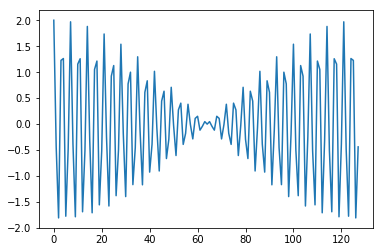

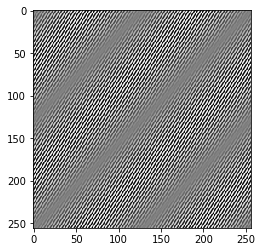

In [7]:
a = np.zeros((128, 128))
a[22,36] = 1
a[-23,-37] = 1

# a = a + 1j * a
# a = np.eye(8) + 1j * np.eye(8)
print(a)
plt.imshow(a.imag, cmap='gray')
plt.show()

A = fft2(a)
fig = plt.figure(figsize=[10, 10])
plt.imshow(A.real, cmap='gray')
plt.show()

print(A)

plt.plot(A[0])
plt.show()

A2 = np.hstack((A.imag,A.imag))
plt.imshow((np.vstack( (A2,A2) )), cmap='gray')
plt.show()

1. Experimente visualizar a Transformada de Fourier de diversas formas: sem fazer a translação periódica, sem calcular o logaritmo. Observe as diferenças e comente.
2. Crie uma função auxiliar de visualização da Transformada de Fourier, assim como fizeram para visualização de múltiplas imagens, pois ela será bastante utilizada neste e nos próximos notebooks.
3. Explique porque o espectro de Fourier não aparece como apenas 2 pontos (senoide). Modifique a senoide *f* para obter apenas 2 pontos na Transformada de Fourier. (DICA: a imagem *f* que estamos buscando ainda será uma senoide bidimensional, porém com alguma propriedade que evite o efeito observado.) Uma outra maneira de tentar entender o que está causando o problema é criar o espectro que se deseja de forma sintética (uma imagem com 2 pontos equidistantes do centro e diametralmente opostos - dizemos que é um par de pontos complexos conjugados) e fazer a transformada inversa de Fourier (ifft2 do numpy) para obter a imagem da senoide buscada.